In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier

In [2]:
#Only run this code snippet if your dataset is located in a different directory than the directory you are running your
#Jupyter Notebook.

#import os
#os.chdir("`")

In [3]:
bank=pd.read_csv("bank.csv")

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4982 non-null   int64  
 1   Age                 4982 non-null   int64  
 2   Experience          4982 non-null   int64  
 3   Income              4982 non-null   int64  
 4   ZIP_Code            4982 non-null   int64  
 5   Family_members      4982 non-null   int64  
 6   CCAvg               4982 non-null   float64
 7   Education           4982 non-null   int64  
 8   Mortgage            4982 non-null   int64  
 9   Personal_Loan       4982 non-null   int64  
 10  Securities_Account  4982 non-null   int64  
 11  CD_Account          4982 non-null   int64  
 12  Online              4982 non-null   int64  
 13  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 545.0 KB


In [6]:
bank = bank.drop(['ID','ZIP_Code'], axis=1)
bank.head()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = bank['Personal_Loan']
x = bank.drop(['Personal_Loan'], axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=27)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
x_train = sc.fit_transform(x_train)

In [13]:
x_train

array([[ 0.22702424,  0.15893175,  1.41450874, ...,  3.92057292,
         0.83032402,  1.55627193],
       [-0.99936387, -0.89167492,  0.78275964, ..., -0.25506476,
         0.83032402, -0.64256122],
       [-0.64896727, -0.54147269, -0.76393643, ..., -0.25506476,
         0.83032402, -0.64256122],
       ...,
       [-0.38616981, -0.27882103, -0.06683397, ..., -0.25506476,
         0.83032402,  1.55627193],
       [-0.29857066, -0.19127047, -1.13427211, ..., -0.25506476,
         0.83032402, -0.64256122],
       [ 1.7162098 ,  1.73484175,  0.95703526, ...,  3.92057292,
         0.83032402,  1.55627193]])

In [14]:
x_test = sc.transform(x_test)

In [15]:
x_test

array([[-1.34976047e+00, -1.41697825e+00,  1.29226092e-01, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.47219008e+00, -1.39568553e+00, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-1.52495877e+00, -1.50452880e+00, -1.48061803e-03, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       ...,
       [-2.10971513e-01, -1.91270471e-01, -7.85720880e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-2.98570664e-01, -1.91270471e-01,  1.54521545e+00, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.38463953e+00, -3.06462942e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01]])

In [16]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [17]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1354,    0],
       [ 136,    5]], dtype=int64)

In [20]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[3148,    2],
       [ 324,   13]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1354
           1       1.00      0.04      0.07       141

    accuracy                           0.91      1495
   macro avg       0.95      0.52      0.51      1495
weighted avg       0.92      0.91      0.87      1495



In [22]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3150
           1       0.87      0.04      0.07       337

    accuracy                           0.91      3487
   macro avg       0.89      0.52      0.51      3487
weighted avg       0.90      0.91      0.87      3487



In [23]:
import matplotlib.pyplot as plt

AUC: 0.913


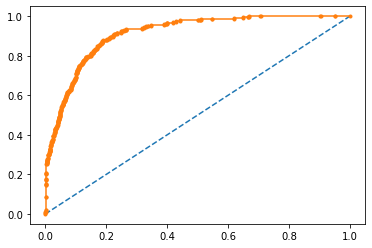

In [24]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.924


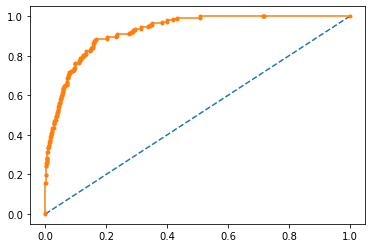

In [25]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()